In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
benchmark_results_path = "../results/"

data = []
for root, dirs, files in os.walk(benchmark_results_path):
    for file in files:
        if file.endswith(".csv"):
            df_ = pd.read_csv(os.path.join(root, file))
            model_name = root.split("/")[2]
            env_name = root.split("/")[3]
            context_length = root.split("/")[4].split("_")[-1]
            df_["model_name"] = model_name
            df_["env_name"] = env_name
            df_["context_length"] = context_length
            df_["run_name"] = model_name + "_contextLen:" + context_length
            data.append(df_)

df = pd.concat(data)

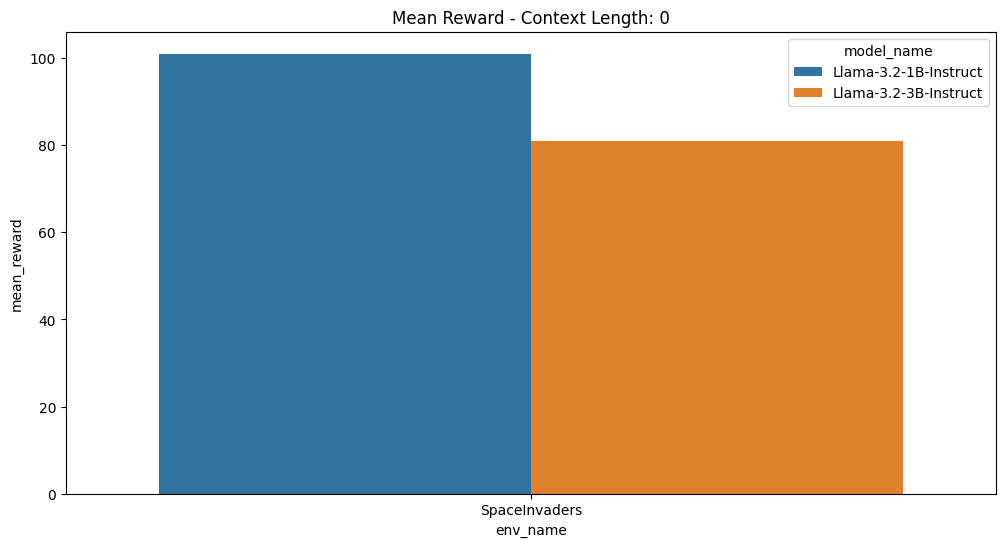

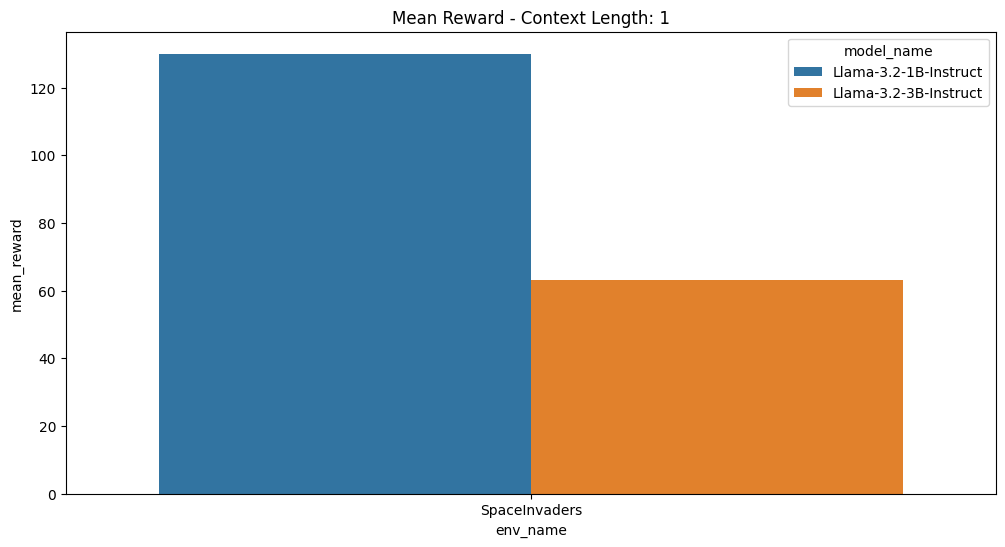

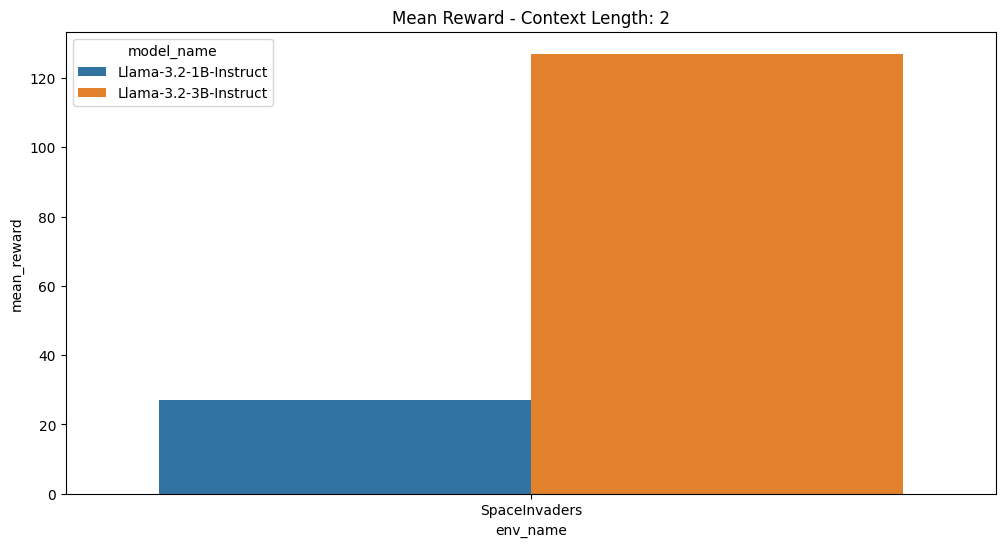

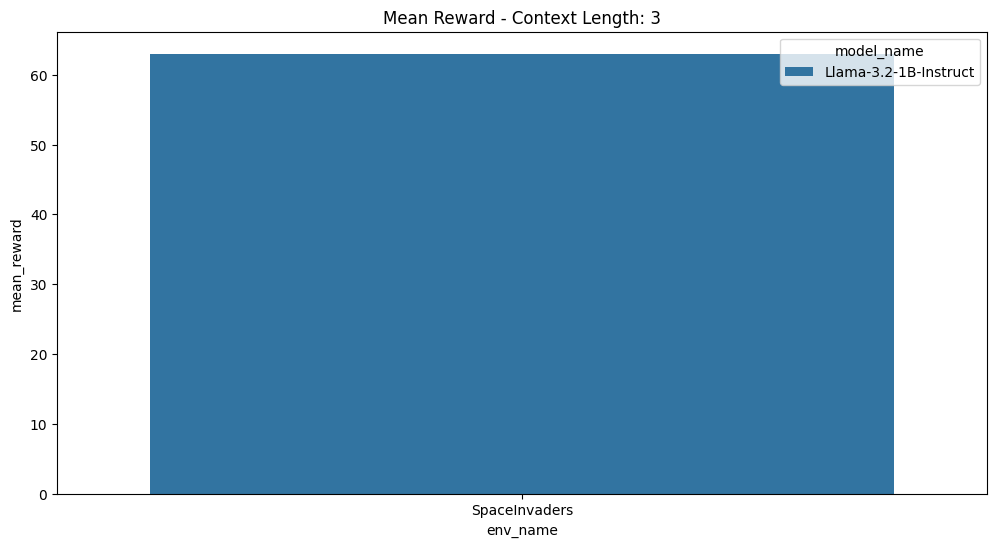

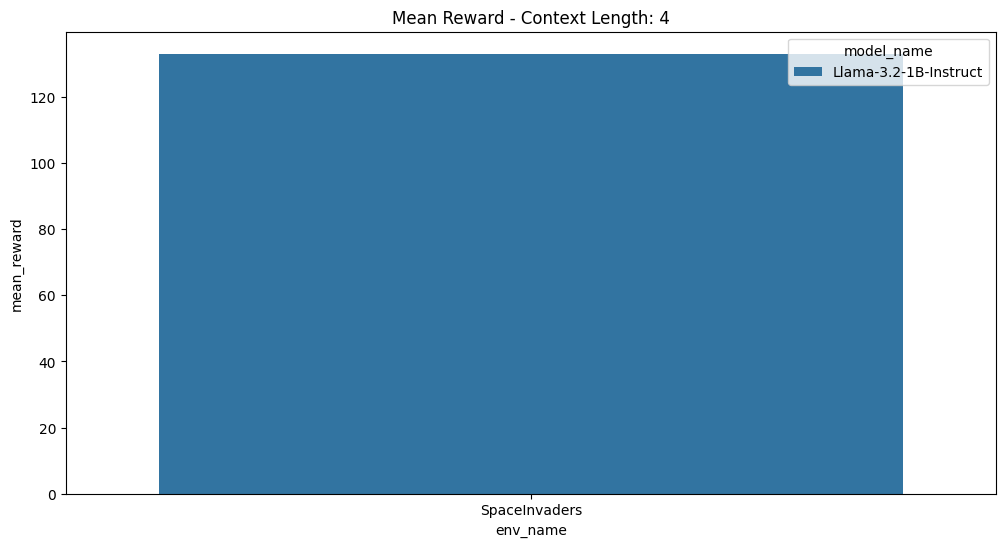

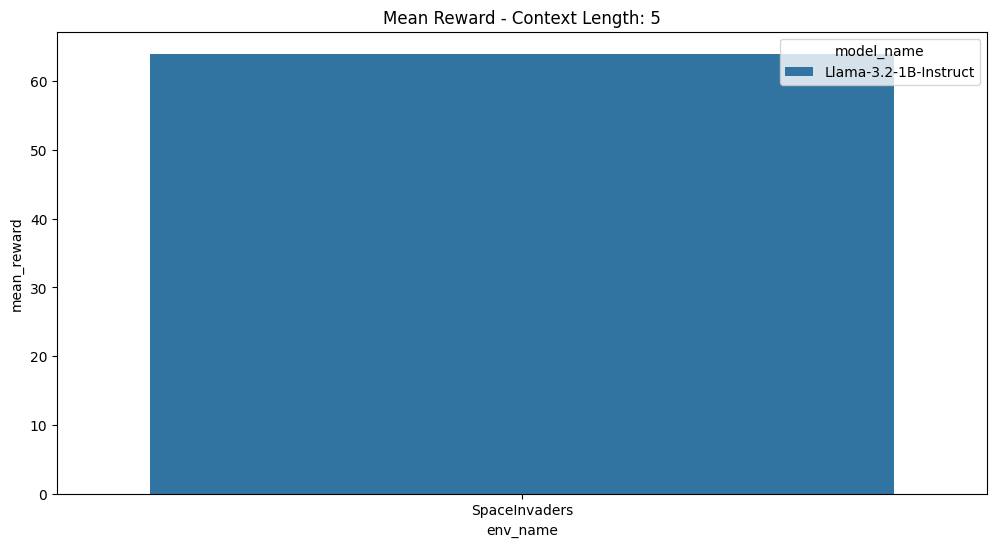

In [3]:
sorted_unique_context_lengths = np.sort(df["context_length"].unique())
for context_length in sorted_unique_context_lengths:
    df_ = df[df["context_length"] == context_length]
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x="env_name",
        y="mean_reward",
        hue="model_name",
        data=df_,
    )

    plt.title(f"Mean Reward - Context Length: {context_length}")
    plt.show()